# Описание проекта

В этом проекте представлено исследование вакансий на аналитиков данных и Data-science специалистов. Данные получены через API HH.ru

**Цель исследования:** выявить разницу между вакансиями на аналитика данных и Data-Science специалистов.

**План работы:**
1. Загрузка данных и подготовка их к анализу
2. Провести исследовательский анализ данных
3. Определить доли грейдов Junior, Junior+, Middle, Senior среди вакансий
4. Определить наиболее желаемых кандидатов по скиллам в разбивке по hard и soft в разрезе грейдов
5. Определить типичное место работы для DS и DA специалистов по следующим параметрам: топ-работодателей, тип занятости, график работы
6. Сформировать выводы и рекомендации
7. Оформить дашборд

Описание данных:
В таблицах с вакансиями на DA и DS столбцы одинаковые:
* id - уникальный номер вакансии
* name - название вакансии
* published_at - дата публикации вакансии
* alternate_url - ссылка на вакансию
* type - тип вакансии
* employer - работодатель
* department - подразделение работодателя
* area - регион вакансии
* experience - требуемый опыт работы
* key_skills - требуемые скиллы
* schedule - график работы
* employment - тип занятости
* description - подробное описание вакансии
* salary_from - зарплата от
* salary_to - зарплата до
* currency_salary - валюта зарплаты

# Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats as st
import re
import requests
from  matplotlib.ticker import FuncFormatter
import warnings

In [ ]:
# зададим предварительные настройи отображения в pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.options.mode.chained_assignment = None

# устанавливаем стиль графиков
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [ ]:
# загрузка с гугл-диска датасета в контекст
!gdown 1fgWXkO4opLF9QdUhaisEDVzdoZZfcLzB #загружаем датасет вакансий аналитиков
!gdown 17lm8Ho74QJ4IEHRqnwmuWEzGQK0iGkXb #загружаем датасет вакансий датасаентистов

Downloading...
From: https://drive.google.com/uc?id=1fgWXkO4opLF9QdUhaisEDVzdoZZfcLzB
To: /content/analytics-data.csv
100% 7.21M/7.21M [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=17lm8Ho74QJ4IEHRqnwmuWEzGQK0iGkXb
To: /content/data-scientists.csv
100% 3.66M/3.66M [00:00<00:00, 46.4MB/s]


In [ ]:
# определим цвета для графиков
COLORS = {
    'DA': '#429cf5',
    'DS': '#7b42f5'
    }

COLORS_DA = {
    'Полная занятость': '#86B6E6',
    'Стажировка': '#5E93C7',
    'Сменный график': '#429cf5',
    'Частичная занятость': '#63A5E7',
    'Полный день': '#86B6E6',
    'Удаленная работа': '#5E93C7',
    'Проектная работа': '#63A5E7',
    'Гибкий график': '#429cf5',
    'Сменный график': '#63A5E7',
    'Junior (no experience)': '#429cf5',
    'Junior+ (1-3 years)': '#5E93C7',
    'Middle (3-6 years)': '#86B6E6',
    'Senior (6+ years)': '#63A5E7',
    'ЗП не указана': '#86B6E6',
    'Меньше 100 тысяч': '#429cf5',
    'От 100 тысяч до 200 тысяч': '#5E93C7',
    'От 200 тысяч до 300 тысяч': '#63A5E7',
    'Больше 300 тысяч': '#86B6E6',
    'common': '#FCD757'

}

COLORS_DS = {
    'Полная занятость': '#8565D6',
    'Стажировка': '#9189AD',
    'Проектная работа': '#7b42f5',
    'Частичная занятость': '#9784CF',
    'Полный день': '#8565D6',
    'Удаленная работа': '#9189AD',
    'Проектная работа': '#7b42f5',
    'Гибкий график': '#7b42f5',
    'Сменный график': '#9784CF',
    'Вахтовый метод': '#ADA5C9',
    'Junior (no experience)': '#7b42f5',
    'Junior+ (1-3 years)': '#9189AD',
    'Middle (3-6 years)': '#8565D6',
    'Senior (6+ years)': '#9784CF',
    'ЗП не указана': '#8565D6',
    'Меньше 100 тысяч': '#7b42f5',
    'От 100 тысяч до 200 тысяч': '#8565D6',
    'От 200 тысяч до 300 тысяч': '#9784CF',
    'Больше 300 тысяч': '#ADA5C9',
    'common': '#FCD757'
}

In [ ]:
data_da, data_ds = (
pd.read_csv('/content/analytics-data.csv', parse_dates=['published_at']),
    pd.read_csv('/content/data-scientists.csv',  parse_dates=['published_at'])
    )

In [ ]:
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary
0,107589757,Data Engineer/Data Analyst,2024-09-21 17:14:34+03:00,https://hh.ru/vacancy/107589757,Открытая,IMANTECH,NaN,Ташкент,Нет опыта,"['SQL', 'Визуализация данных', 'Python', 'Powe...",Гибкий график,Полная занятость,"About Us: Welcome to “IMAN TECH”, where innova...",NaN,NaN,NaN
1,107653550,Аналитик,2024-09-23 16:02:52+03:00,https://hh.ru/vacancy/107653550,Открытая,РГП на ПХВ Республиканский центр электронного ...,NaN,Астана,Нет опыта,"['Аналитическое мышление', 'SWOT-анализ', 'MS ...",Полный день,Полная занятость,Образование высшее образование в области инфор...,NaN,NaN,NaN
2,107694170,Junior-аналитик,2024-09-24 12:33:46+03:00,https://hh.ru/vacancy/107694170,Открытая,Sulpak,NaN,Алматы,От 1 года до 3 лет,[],Полный день,Полная занятость,SULPAK – лидер по продажам бытовой техники и э...,NaN,NaN,NaN
3,107621403,Бизнес аналитик/дата аналитик,2024-09-23 10:52:52+03:00,https://hh.ru/vacancy/107621403,Открытая,Bereke Bank,NaN,Алматы,Нет опыта,[],Полный день,Полная занятость,Обязанности: самостоятельно осуществлять раб...,NaN,NaN,NaN
4,107696458,Аналитик данных/ Data analyst,2024-09-24 13:02:01+03:00,https://hh.ru/vacancy/107696458,Открытая,Bereke Bank,NaN,Алматы,От 1 года до 3 лет,[],Полный день,Полная занятость,Обязанности: Поддерживать один из стримов dig...,NaN,NaN,NaN


In [ ]:
data_ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary
0,107653589,Data Scientist,2024-09-23 16:03:25+03:00,https://hh.ru/vacancy/107653589,Открытая,IT Space Apps,NaN,Алматы,От 1 года до 3 лет,"['MS SQL', 'Математический анализ', 'Исследова...",Полный день,Полная занятость,Мы в поиске супер крутого Data Scientist для н...,"500,000.00",NaN,KZT
1,107602508,Junior Data Scientist,2024-09-23 07:15:53+03:00,https://hh.ru/vacancy/107602508,Открытая,Meridian group,NaN,Иркутск,Нет опыта,[],Полный день,Полная занятость,Компания «Меридиан групп» приглашает в растущи...,NaN,"50,000.00",RUR
2,107194845,Стажер - Data Scientist,2024-09-12 13:06:27+03:00,https://hh.ru/vacancy/107194845,Открытая,Эр-1,NaN,Пермь,Нет опыта,[],Удаленная работа,Стажировка,"R1 — это новый взгляд на пространство, в котор...",NaN,NaN,NaN
3,107623431,Data Analyst / Data Scientist (Junior/Junior+),2024-09-23 11:11:08+03:00,https://hh.ru/vacancy/107623431,Открытая,Kept (Кэпт),"Kept, Технологическая практика",Москва,От 1 года до 3 лет,"['Python', 'SQL', 'Математическая статистика',...",Полный день,Полная занятость,Мы в поиске талантливого кандидата на вакансию...,NaN,NaN,NaN
4,106834617,"Data scientist (Computer Vision), junior/middle",2024-09-05 12:38:44+03:00,https://hh.ru/vacancy/106834617,Открытая,ЦИТМ Экспонента,NaN,Москва,Нет опыта,"['алгоритмы', 'Линейная алгебра', 'Data Scienc...",Удаленная работа,Полная занятость,Центр инженерных технологий и моделирования «Э...,NaN,NaN,NaN


In [ ]:
# добавим флаговую переменную
data_da['area_spec'] = 'DA'
data_ds['area_spec'] = 'DS'

# объединим датафреймы

data = pd.concat((data_da, data_ds))

In [ ]:
data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,area_spec
0,107589757,Data Engineer/Data Analyst,2024-09-21 17:14:34+03:00,https://hh.ru/vacancy/107589757,Открытая,IMANTECH,NaN,Ташкент,Нет опыта,"['SQL', 'Визуализация данных', 'Python', 'Powe...",Гибкий график,Полная занятость,"About Us: Welcome to “IMAN TECH”, where innova...",NaN,NaN,NaN,DA
1,107653550,Аналитик,2024-09-23 16:02:52+03:00,https://hh.ru/vacancy/107653550,Открытая,РГП на ПХВ Республиканский центр электронного ...,NaN,Астана,Нет опыта,"['Аналитическое мышление', 'SWOT-анализ', 'MS ...",Полный день,Полная занятость,Образование высшее образование в области инфор...,NaN,NaN,NaN,DA
2,107694170,Junior-аналитик,2024-09-24 12:33:46+03:00,https://hh.ru/vacancy/107694170,Открытая,Sulpak,NaN,Алматы,От 1 года до 3 лет,[],Полный день,Полная занятость,SULPAK – лидер по продажам бытовой техники и э...,NaN,NaN,NaN,DA
3,107621403,Бизнес аналитик/дата аналитик,2024-09-23 10:52:52+03:00,https://hh.ru/vacancy/107621403,Открытая,Bereke Bank,NaN,Алматы,Нет опыта,[],Полный день,Полная занятость,Обязанности: самостоятельно осуществлять раб...,NaN,NaN,NaN,DA
4,107696458,Аналитик данных/ Data analyst,2024-09-24 13:02:01+03:00,https://hh.ru/vacancy/107696458,Открытая,Bereke Bank,NaN,Алматы,От 1 года до 3 лет,[],Полный день,Полная занятость,Обязанности: Поддерживать один из стримов dig...,NaN,NaN,NaN,DA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2870 entries, 0 to 869
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   id               2870 non-null   int64                    
 1   name             2870 non-null   object                   
 2   published_at     2870 non-null   datetime64[ns, UTC+03:00]
 3   alternate_url    2870 non-null   object                   
 4   type             2870 non-null   object                   
 5   employer         2870 non-null   object                   
 6   department       622 non-null    object                   
 7   area             2870 non-null   object                   
 8   experience       2870 non-null   object                   
 9   key_skills       2870 non-null   object                   
 10  schedule         2870 non-null   object                   
 11  employment       2870 non-null   object                   
 12

Много пропущенных значений в полях зарплаты, скорее ввиду рекрутинговой политики компании, и в поле department, но это скорее опциональное поле.

# Предобработка данных

## Работа с типами данных

Добавим поле с датой публикации вакансии в формате date

In [ ]:
data.loc[:, 'published_date'] = data.published_at.dt.date

## Поиск и удаление нерелевантных вакансий для исследования

Так как набор данных был сформирован на основе наличия в названии вакансии определённых ключевых слов, в него могли случайно попасть вакансии, которые не имеют прямого отношения к деятельности специалистов в области Data Analytics и Data Science. Поэтому выявим и исключим из набора данных такие вакансии.

In [ ]:
# поиск нерелевантных вакансий через наименования
data.name.str.lower().unique().tolist()

['data engineer/data analyst',
 'аналитик',
 'junior-аналитик',
 'бизнес аналитик/дата аналитик',
 'аналитик данных/ data analyst',
 'системный аналитик (ученик на курс)',
 'аналитик базы данных excel',
 'ночной аналитик/оператор',
 'младший аналитик данных',
 'руководитель отдела управленческой отчетности и аналитики',
 'стажер в отдел big data аналитики и data science',
 'младший аналитик (удаленная работа)',
 'начинающий антифрод-аналитик (anti-fraud analyst)',
 'стажер / системный аналитик',
 'аналитик-стажер / junior analyst',
 'младший аналитик',
 'финансовый аналитик',
 'аналитик данных',
 'стажер bi аналитик',
 'аналитик данных / стажер',
 'стажер soc аналитик',
 'аналитик данных (junior)',
 'стажер в команду аналитики сервиса путешествий',
 'стажер/начинающий системный аналитик',
 'стажер-аналитик',
 'аналитик данных (беттинг, гемблинг)',
 'project manager/business analyst',
 'аналитик технических данных (удаленно)',
 'аналитик (python, дашборды)',
 'химик-аналитик аналитическ

In [ ]:
# приведем наименования к нижнему регистру
data.name = data.name.str.lower()
# чистим нерелевантные вакансии по назаванию
mask = (data.name.str.contains('методист') |
        data.name.str.contains('менеджер') |
        data.name.str.contains('консультант') |
        data.name.str.contains('бизнес') |
        data.name.str.contains('руководитель') |
        data.name.str.contains('руководитель') |
        data.name.str.contains('маркетолог') |
        data.name.str.contains('ассистент') |
        data.name.str.contains('писатель') |
        data.name.str.contains('проектный') |
        data.name.str.contains('bi') |
        data.name.str.contains('system') |
        data.name.str.contains('системный') |
        data.name.str.contains('manager') |
        data.name.str.contains('лидер') |
        data.name.str.contains('преподаватель') |
        data.name.str.contains('помощник') |
        data.name.str.contains('bysiness') |
        data.name.str.contains('bi-аналитик') |
        data.name.str.contains('химик') |
        data.name.str.contains('директор') |
        data.name.str.contains('куратор') |
        data.name.str.contains('персонала') |
        data.name.str.contains('техподдержки') |
        data.name.str.contains('моделер')|
        data.name.str.contains('ml') |
        data.name.str.contains('engeneer') |
        data.name.str.contains('инженер'))

data = data[~mask]
start_data_size = data.shape[0]
print(f'Удалили {(1-data.shape[0]/2870):.0%} нерелевантных данных. Итоговый размер датасета - {start_data_size}')

Удалили 43% нерелевантных данных. Итоговый размер датасета - 1625


## Поиск и обработка дубликатов

Датасет содержит вакансии, связанные с аналитикой данных (Data Science/Analytics, DS/DA), но их названия не позволяют однозначно определить, к какой категории они относятся. Посмотрим, сколько таких вакансий в датасете.

In [ ]:
mask = (data.name.str.contains('data scienc') & data.name.str.contains('analyst')| data.name.str.contains('аналитик') & data.name.str.contains('data scien'))
print(f'Смежных вакансий - {data[mask].shape[0]}')
data[mask].head()

Смежных вакансий - 25


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,area_spec,published_date
217,107106575,junior data scientist (аналитик),2024-09-11 09:28:33+03:00,https://hh.ru/vacancy/107106575,Открытая,Займиго МФК,NaN,Нижний Новгород,Нет опыта,"['Python', 'Статистический анализ', 'Прогнозир...",Полный день,Полная занятость,Кого ищем: Аналитика данных уровня junior + ...,"60,000.00","100,000.00",RUR,DA,2024-09-11
357,107474193,аналитик данных/data scientist,2024-09-18 18:22:48+03:00,https://hh.ru/vacancy/107474193,Открытая,Фонд перспективных исследований,NaN,Москва,От 3 до 6 лет,[],Полный день,Полная занятость,Мы приглашаем к сотрудничеству н​​​​а один из ...,NaN,NaN,NaN,DA,2024-09-18
688,103937456,data scientist (аналитик данных),2024-09-20 13:39:05+03:00,https://hh.ru/vacancy/103937456,Открытая,Enot.io,NaN,Казань,От 1 года до 3 лет,[],Полный день,Полная занятость,"Enot – это компания, работающая в FinTech отра...",NaN,NaN,NaN,DA,2024-09-20
1280,103903449,senior data scientist (департамент аналитики и...,2024-09-06 23:15:58+03:00,https://hh.ru/vacancy/103903449,Открытая,Банк Русский Стандарт,NaN,Москва,От 3 до 6 лет,"['SQL', 'Работа с базами данных', 'Базы данных...",Полный день,Полная занятость,"ОБЯЗАННОСТИ: Разработка, валидация и монитори...",NaN,NaN,NaN,DA,2024-09-06
1426,106797562,аналитик данных (data science) на python удаленно,2024-09-04 17:38:33+03:00,https://hh.ru/vacancy/106797562,Открытая,Точка Зрения,NaN,Ярославль,От 3 до 6 лет,"['Python', 'Scikit-learn', 'OpenCV', 'Computer...",Полный день,Полная занятость,Обязанности: На основе поставленной Заказчиком...,NaN,NaN,NaN,DA,2024-09-04


In [ ]:
data = data[~mask]
print(f'Удалили {1-data.shape[0]/start_data_size:.2%}')

Удалили 1.54%


Поищем дубликаты по полю id

In [ ]:
id_duplicates = data.duplicated(subset='id')
print(f"Дубликатов по полю id - {id_duplicates.sum()}. Удалили - {id_duplicates.sum()/start_data_size:.2%} данных")
data.drop_duplicates(subset='id', keep='first', inplace=True)

Дубликатов по полю id - 4. Удалили - 0.25% данных


Проверим есть ли неявные дубликаты

In [ ]:
cat_duplicates = data.duplicated(subset=['name', 'employer', 'department', 'type', 'experience', 'area'])
print(f"Неявных дубликатов - {cat_duplicates.sum()}. Удалили - {cat_duplicates.sum()/start_data_size:.2%} данных")
data.drop_duplicates(subset=['name', 'employer', 'department', 'type', 'experience', 'area'], keep='first', inplace=True)

Неявных дубликатов - 13. Удалили - 0.80% данных


## Поиск аномальных значений

Проведем проверку количественных значений на выбросы

Создадаим переменную salary, которая будет содержать зарплату или nan

In [ ]:
def calc_salary(row: pd.Series) -> float:
  # Указаны ли оба порога зарплаты, если да, то возвращаем среднее
  if not row.isna()['salary_to'] and not row.isna()['salary_from']:
    return (row.salary_to + row.salary_from) / 2

  # Возвращаем верхний порог зп, если указан
  if not row.isna()['salary_to']:
    return row.salary_to

  # Возвращаем нижний порог зп, если указан
  if not row.isna()['salary_from']:
    return row.salary_from

data['salary'] = data.apply(calc_salary, axis=1)

Посомтрим какие значения в currency_salary

In [ ]:
data.currency_salary.value_counts()

,count
currency_salary,
RUR,515
KZT,34
USD,17
BYR,9
UZS,8
KGS,3
EUR,2


Переведем все зарплаты в рублевый эквивалент

In [ ]:
def convert_salary(row: pd.Series, cb: dict) -> float:
  if row.currency_salary == 'RUR' or row.currency_salary is np.nan:
    return row['salary']

  # Если валюта указана как BYR, поменяем ее на BYN
  if row.currency_salary == 'BYR':
    row.currency_salary = 'BYN'

  # Получаем курс валюты из словаря ЦБ
  dic = cb['Valute'][row['currency_salary']]
  rates = dic['Value'] / dic['Nominal']

  # Возвращаем зп в рублях
  return row.salary * rates

# Получим данные курса валют ЦБ
CB = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()

data['salary_rub'] = data.apply(convert_salary, axis=1, cb=CB)

Теперь сгруппируем зарплату по категориям

In [ ]:
def bin_salary(row: pd.Series) -> str:
  if row.isna()['salary_rub']:
    return 'ЗП не указана'

  else:
    if row.salary_rub > 3e5:
      return 'Больше 300 тысяч'
    if row.salary_rub > 2e5:
      return 'От 200 тысяч до 300 тысяч'
    if row.salary_rub > 1e5:
      return 'От 100 тысяч до 200 тысяч'
    else:
      return 'Меньше 100 тысяч'

data['salary_bin'] = data.apply(bin_salary, axis=1)

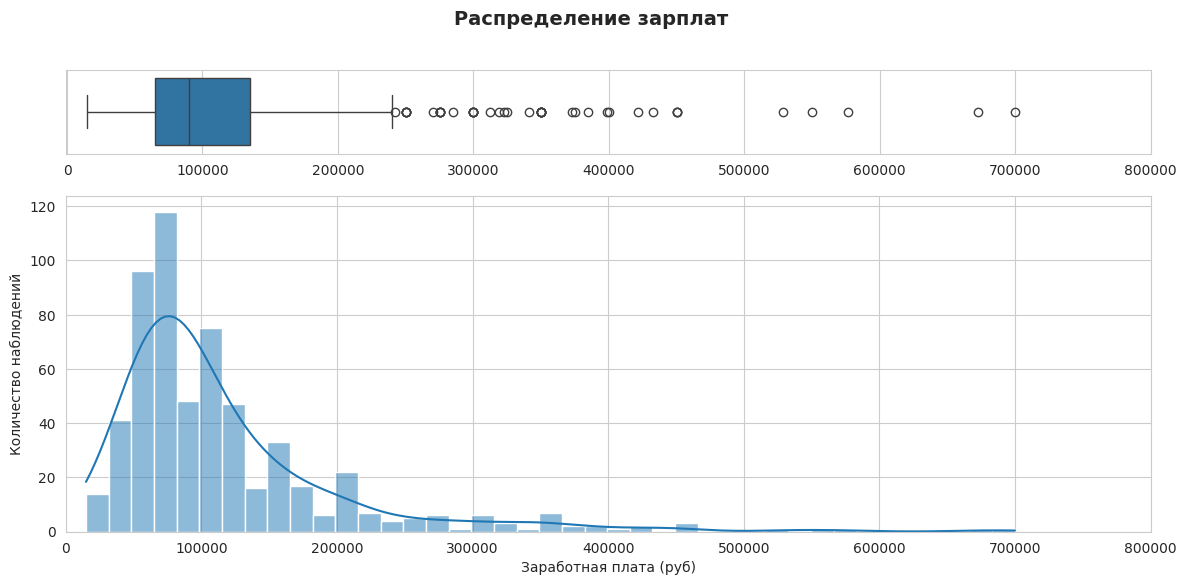

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), nrows=2, ncols=1, gridspec_kw={'height_ratios': (0.2, 0.8)})


sns.boxplot(data=data['salary_rub'], ax=ax[0], orient='h')
ax[0].set_xlim(-1000, 800000)
ax[0].set_xlabel('')

sns.histplot(data=data['salary_rub'], kde=True, ax=ax[1])

ax[1].set_xlim(0,800000)
ax[1].set_xlabel('Заработная плата (руб)')
ax[1].set_ylabel('Количество наблюдений')

plt.suptitle('Распределение зарплат', fontsize=14, fontweight='bold')
plt.show()

На графике наблюдается большое количество выбросов, которые, вероятно, связаны с вакансиями на высокооплачиваемые или уникальные позиции. Вполне ожидаемо для такого рода вакансий, поэтому нет необходимости исключать эти данные. Медианная зарплата чуть ниже 100 тыс руб.

## Проверка категориальных значений

Посмотрим на значения поля area

In [ ]:
data.area.value_counts()

,count
area,
Москва,823
Санкт-Петербург,145
Алматы,52
Минск,40
Новосибирск,39
...,...
Астрахань,1
ОАЭ,1
Березовский (Свердловская область),1


Тут проблем не обнаружено.

Посмотрим на поле experience

In [ ]:
data.experience.value_counts()

,count
experience,
От 1 года до 3 лет,819
От 3 до 6 лет,377
Нет опыта,350
Более 6 лет,37


Добавим общепринятую градацию опыта - Junior(no experience), Junior+(1-3 years), Middle(3-6 years), Senior(6+ years)

In [ ]:
def experiece(val:str) ->str:
  # проверка на наличие цифр в строке
  experience = re.findall(r'\d', val)

  if not experience:
    return 'Junior (no experience)'
  elif experience[0] == '1':
    return 'Junior+ (1-3 years)'
  elif experience[0] == '3':
    return 'Middle (3-6 years)'
  elif experience[0] == '6':
    return 'Senior (6+ years)'

data['experience'] = data.experience.apply(experiece)

data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,salary_from,salary_to,currency_salary,area_spec,published_date,salary,salary_rub,salary_bin
0,107589757,data engineer/data analyst,2024-09-21 17:14:34+03:00,https://hh.ru/vacancy/107589757,Открытая,IMANTECH,NaN,Ташкент,Junior (no experience),"['SQL', 'Визуализация данных', 'Python', 'Powe...",Гибкий график,Полная занятость,"About Us: Welcome to “IMAN TECH”, where innova...",NaN,NaN,NaN,DA,2024-09-21,NaN,NaN,ЗП не указана
1,107653550,аналитик,2024-09-23 16:02:52+03:00,https://hh.ru/vacancy/107653550,Открытая,РГП на ПХВ Республиканский центр электронного ...,NaN,Астана,Junior (no experience),"['Аналитическое мышление', 'SWOT-анализ', 'MS ...",Полный день,Полная занятость,Образование высшее образование в области инфор...,NaN,NaN,NaN,DA,2024-09-23,NaN,NaN,ЗП не указана
2,107694170,junior-аналитик,2024-09-24 12:33:46+03:00,https://hh.ru/vacancy/107694170,Открытая,Sulpak,NaN,Алматы,Junior+ (1-3 years),[],Полный день,Полная занятость,SULPAK – лидер по продажам бытовой техники и э...,NaN,NaN,NaN,DA,2024-09-24,NaN,NaN,ЗП не указана
4,107696458,аналитик данных/ data analyst,2024-09-24 13:02:01+03:00,https://hh.ru/vacancy/107696458,Открытая,Bereke Bank,NaN,Алматы,Junior+ (1-3 years),[],Полный день,Полная занятость,Обязанности: Поддерживать один из стримов dig...,NaN,NaN,NaN,DA,2024-09-24,NaN,NaN,ЗП не указана
6,107701618,аналитик базы данных excel,2024-09-24 14:09:23+03:00,https://hh.ru/vacancy/107701618,Открытая,Колбина Александра Александровна,NaN,Москва,Junior+ (1-3 years),[],Удаленная работа,Полная занятость,Аналитик базы данных (EXCEL) в международную к...,"100,000.00","120,000.00",RUR,DA,2024-09-24,"110,000.00","110,000.00",От 100 тысяч до 200 тысяч


Проверим поле schedule

In [ ]:
data.schedule.value_counts()

,count
schedule,
Полный день,1200
Удаленная работа,313
Гибкий график,60
Сменный график,10


Нет ошибок.

Проверим поле employment

In [ ]:
data.employment.value_counts()

,count
employment,
Полная занятость,1494
Стажировка,65
Частичная занятость,20
Проектная работа,4


Приведем в порядок индексы

In [ ]:
data.reset_index(drop=True, inplace=True)

##Вывод по предобработке данных:

В ходе предобработки данных было проведено

# Исследовательский анализ данных

In [ ]:
data.to_csv('/content/data_cleaned.csv')

Псмотрим на минимальные и максимальные даты

In [ ]:
print(f'Минимальная дата - {data.published_at.min().strftime("%Y-%m-%d %X")}')
print(f'Максимальная дата - {data.published_at.max().strftime("%Y-%m-%d %X")}')

Минимальная дата - 2024-08-25 23:19:27
Максимальная дата - 2024-09-25 18:45:45


Посмотрим на публикацию вакансий в динамике

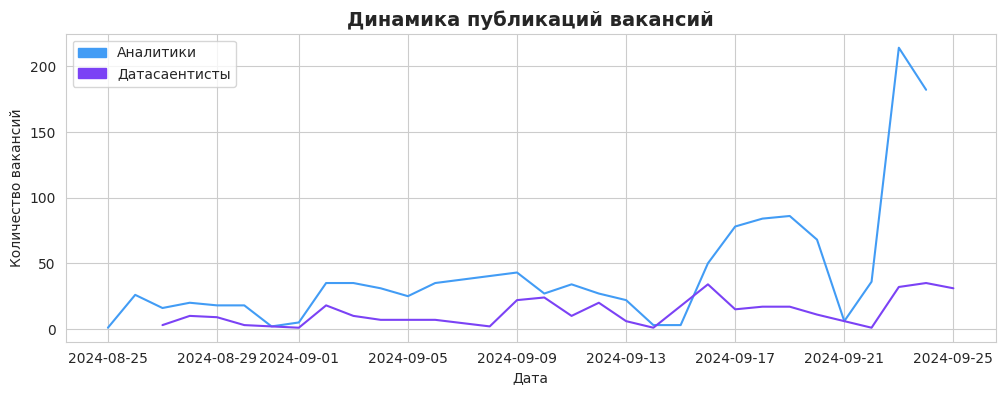

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(data=data.groupby(['published_date', 'area_spec']).agg(ids=('id', 'count')), x='published_date', y='ids', hue='area_spec', palette=COLORS)


plt.title('Динамика публикаций вакансий', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')

# добавляем легенду
analyst_patch = mpatches.Patch(color=COLORS['DA'], label='Aналитики')
datascience_patch = mpatches.Patch(color=COLORS['DS'], label='Датасаентисты')
plt.legend(handles=[analyst_patch, datascience_patch])


plt.show()

Наблюдается всплеск публикации вакансий на аналитиков в конце рассматриваемого периода. За период количество вакансий на аналитиков публикуется больше, чем на DS.

Посмотрим на общую долю вакансий в выборке

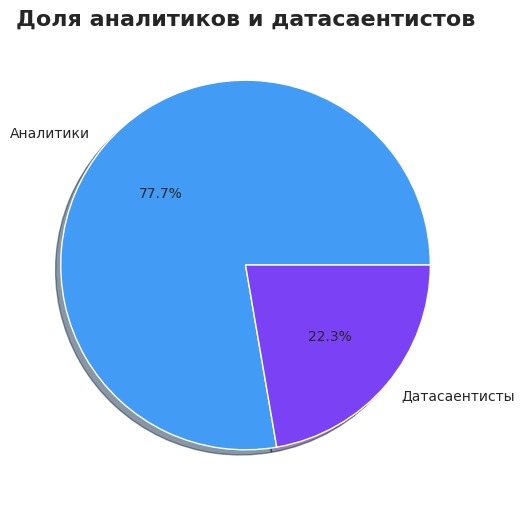

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data.area_spec.value_counts(), colors=[COLORS['DA'], COLORS['DS']], autopct='%1.1f%%', labels=['Аналитики', 'Датасаентисты'], shadow=True)
plt.title('Доля аналитиков и датасаентистов', fontsize=16, fontweight='bold')
plt.show()

Определим доли грейдов среди вакансий

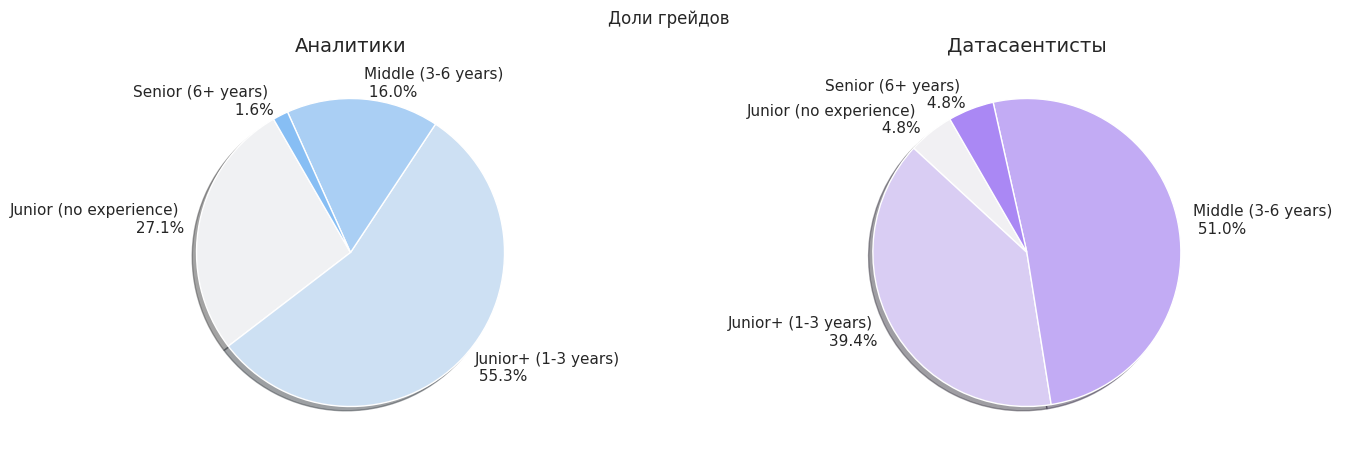

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

data_da = data.query("area_spec == 'DA'").experience.value_counts().sort_index()
data_ds = data.query("area_spec == 'DS'").experience.value_counts().sort_index()

ax[0].pie(data_da, labels=[lbl + f' \n {value / data_da.sum():.1%}' for lbl, value in data_da.items()], textprops={'fontsize': 11}, shadow=True, startangle=120, colors=sns.color_palette(f"light:{COLORS['DA']}"))
ax[0].set_title('Аналитики', fontsize=14)

ax[1].pie(data_ds, labels=[lbl + f' \n {value / data_ds.sum():.1%}' for lbl, value in data_ds.items()], textprops={'fontsize': 11}, shadow=True, startangle=120, colors=sns.color_palette(f"light:{COLORS['DS']}"))
ax[1].set_title('Датасаентисты', fontsize=14)

plt.suptitle('Доли грейдов')
plt.show()

На рынке труда аналитики с небольшим опытом работы (Junior+) и начинающие специалисты (Junior) пользуются большим спросом, в то время как среди датасаентистов востребованы профессионалы среднего уровня (Middle) и начинающие специалисты с небольшим опытом (Junior+). При этом аналитики без опыта работы встречаются в вакансиях чаще, чем датасаентисты без опыта, что указывает на то, что начинающим аналитикам легче найти работу по сравнению с начинающими датасаентистами.

In [ ]:
def plot_popular_val(column: str, n_top: int, title: str, wspace: float) -> None:
  # Создаем датафрейм на основе нужного поля
  df = data.groupby([column, 'area_spec']).agg(amount=('id', 'count')).sort_values(by='amount', ascending=False).reset_index()

  # Создаем основу для графика
  fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=2)

  # Создаем столбчатую диаграмму
  sns.barplot(data=df.query("area_spec == 'DA'")[:10], y=column, x='amount', orient='h', ax=ax[0], color=COLORS['DA'])
  sns.barplot(data=df.query("area_spec == 'DS'")[:10], y=column, x='amount', orient='h', ax=ax[1], color=COLORS['DS'])
  ax[0].set_xlabel('Количество')
  ax[0].set_ylabel('')
  ax[0].set_title('Аналитики данных')
  ax[1].set_xlabel('Количество')
  ax[1].set_ylabel('')
  ax[1].set_title('Датасаентисты')

  plt.suptitle(title, fontsize=14, fontweight='bold')
  plt.subplots_adjust(wspace=wspace, top=0.8)
  plt.show()

Посмотрим каике регионы присутствуют в датасете и на какой приходится большая доля публикаций вакансий

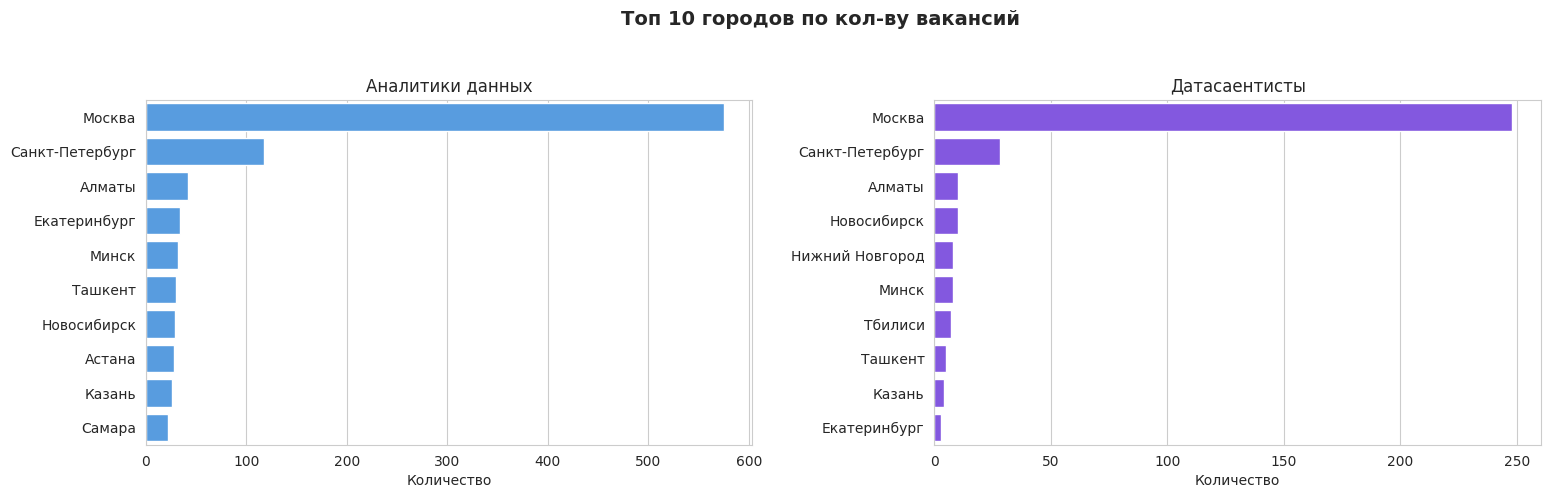

In [ ]:
plot_popular_val('area', 10, 'Топ 10 городов по кол-ву вакансий', 0.3)

Москва и Питербург лидируют по объему вакансий обоих направлений и потдверждают статус крупнейших трудовых центров

Выделим топ 10 наименований вакансий

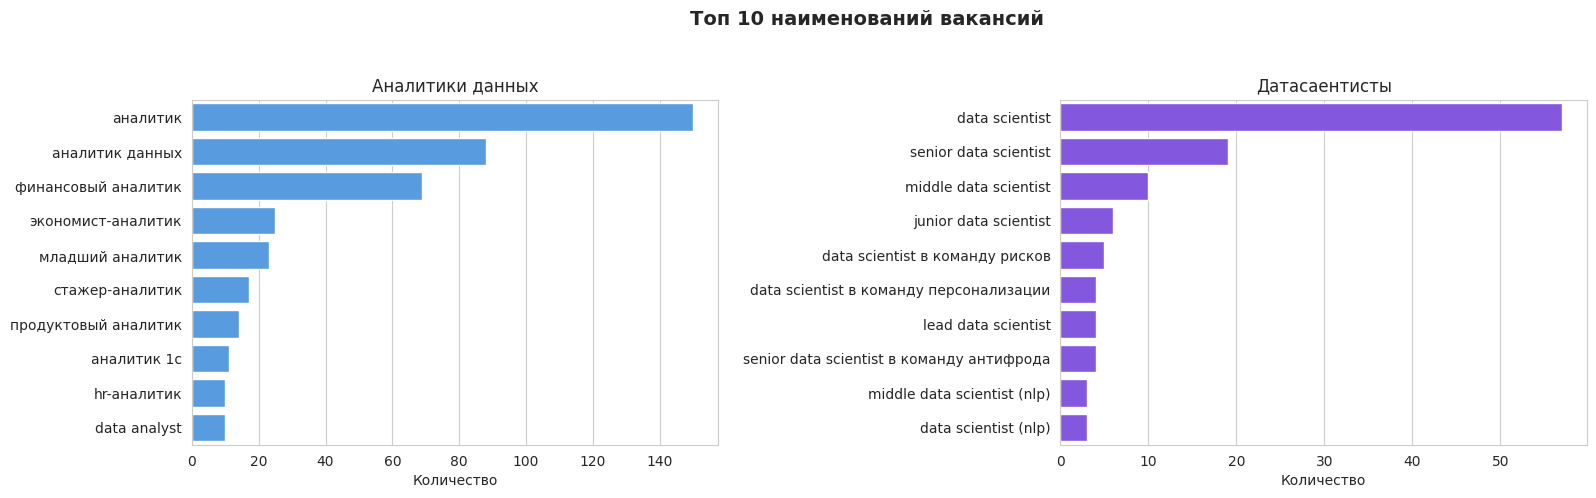

In [ ]:
plot_popular_val('name', 10, 'Топ 10 наименований вакансий', wspace=0.65)

На рынке труда востребованы позиции "Аналитик", "Data Scientis", "Аналитик данных". Среди датасаентистов преобладают вакансии на senior позицию и специализирующие на nlp.

Топ 10 работодателей по количеству вакансий

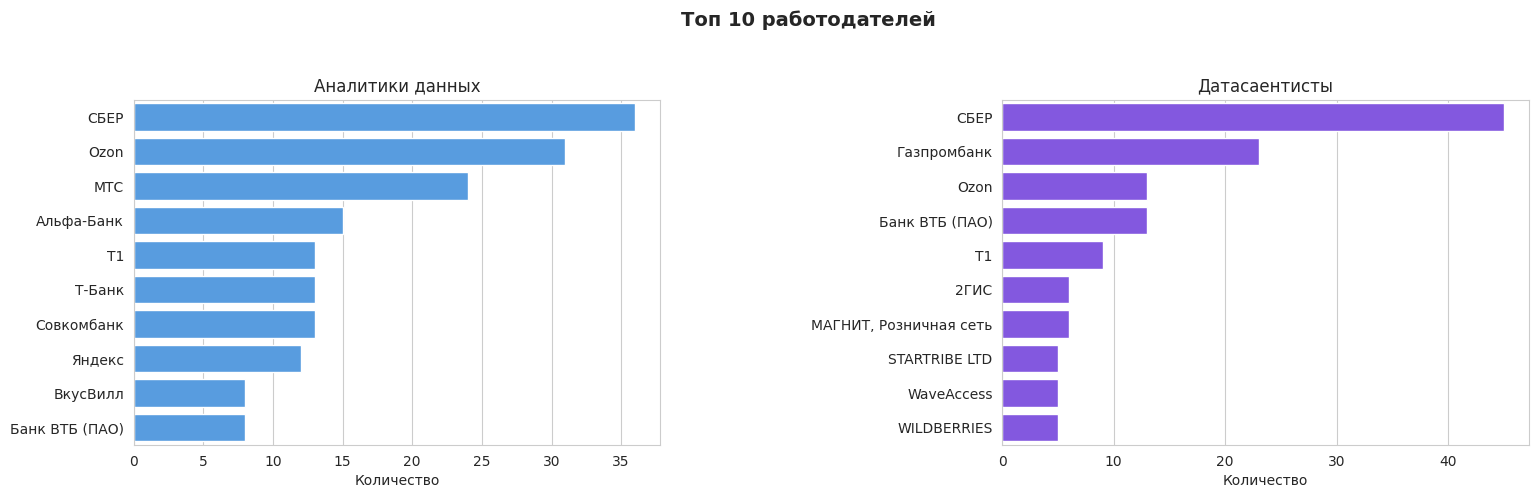

In [ ]:
plot_popular_val('employer', 10, 'Топ 10 работодателей', wspace=0.65)

СБЕР ищет как аналитиков, так и датасаентистов активнее остальных. Также в аналитиках нуждаются Ozon, МТС, Альфа-банк. В датасаентистах нуждаются Газпромбанк, Ozon, ВТБ.
Банки чаще ищут аналитиков, а также e-commerce и IT-компании. Датасаентистов ищут как банкаи, так и e-commerce, так и крупные маркетплейсы.

##Выводы по исследовательскому анализу данных

* Вакансий аналитиков больше, чем вакансий на DS специалистов. Среди аналитиков востребованы специалисты уровня Junior (22%) и Junior+ (55%), а среди Датасаентистов всотребованы Middle и Junior+ специалисты. Среди специалистов Junior доля вакансиый выше у аналитиков.
* Москва и Санкт-Питербург сохраняют свои позиции трудовых центров. Среди работодателей активно ищет аналитиков и датасаентистов СБЕР. Также аналитик востребованы среди банков, e-commerce компаний, а датасаентисты также востребованы у крупных маркетплейсов.

#Наиболее желаемые кандидаты на вакансии Аналитик данных и Data Science

Посмотрим каие скиллы требуют работодатели от аналитиков и датасаентистов

In [ ]:
def get_list_skills(experience: str, spec: str, top: int) -> pd.DataFrame:
  """Выявляет частоту встречаемости нывков из описания вакансий"""

  df_skills = pd.DataFrame()
  df_skills['skills'] = data[(data.experience == experience) & (data.area_spec == spec)]['key_skills'].map(lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
  df_skills.fillna({'skills': ''}, inplace=True)

  # Словарь для подсчета частоты встречаемости навыков
  freq_skills = {}

  # Перебираем список навыков для заданного типа вакансий и уровня опыта
  lst_vacancies = df_skills.skills.to_list()

  for sequence in lst_vacancies:
    skills = sequence.split(', ')
    if skills:
      for skill in skills:
        freq_skills[skill] = freq_skills.get(skill, 0) + 1

  # Объединяем частоты для синонимичных навыков
  freq_skills['excel'] = freq_skills.get('ms excel', 0) + freq_skills.get('excel', 0)
  freq_skills.pop('ms excel', None)

  freq_skills['power bi'] = freq_skills.get('ms power bi', 0) + freq_skills.get('power bi', 0)
  freq_skills.pop('ms power bi', None)

  freq_skills['powerpoint'] = freq_skills.get('ms powerpoint', 0) + freq_skills.get('powerpoint', 0)
  freq_skills.pop('ms powerpoint', None)

  freq_skills['spark'] = freq_skills.get('pyspark', 0) + freq_skills.get('spark', 0)
  freq_skills.pop('pyspark', None)

  # Удаляем слишком общие навыки и пустые значения
  #freq_skills.pop('анализ данных', None)
  freq_skills.pop('machine learning', None)
  freq_skills.pop('ml', None)
  freq_skills.pop('data science', None)
  freq_skills.pop('ds', None)
  freq_skills.pop('it', None)
  freq_skills.pop('работа с большим объемом информации', None)
  freq_skills.pop('мение работать с большими объемами информации', None)
  freq_skills.pop('пользователь пк', None)
  freq_skills.pop('3ds max', None)
  freq_skills.pop('3d max', None)
  freq_skills.pop('autodesk 3ds max', None)
  freq_skills.pop('моделирование', None)
  freq_skills.pop('3d моделирование', None)
  freq_skills.pop('опытный пользователь пк', None)
  freq_skills.pop('', None)

  # Сортируем навыки по убыванию частоты встречаемости
  freq_skills = dict(sorted(freq_skills.items(), key=lambda item: item[1], reverse=True))

  # Ограничиваем список до топ-N навыков
  skill = list(freq_skills.keys())[:top]
  sm = len(lst_vacancies)
  freq = list(freq_skills.values())[:top]
  share = list(map(lambda x: x / sm, freq))

  # Создаем DataFrame и сортируем его по частоте встречаемости
  freq = pd.DataFrame({
          'skill': skill,
          'freq': freq,
          'share': share
          }).sort_values(by='freq', ascending=False)
  freq['skill'] = freq['skill'].map(lambda x: x if len(x) < top+5 else x[:top+5] + '...')

  return freq

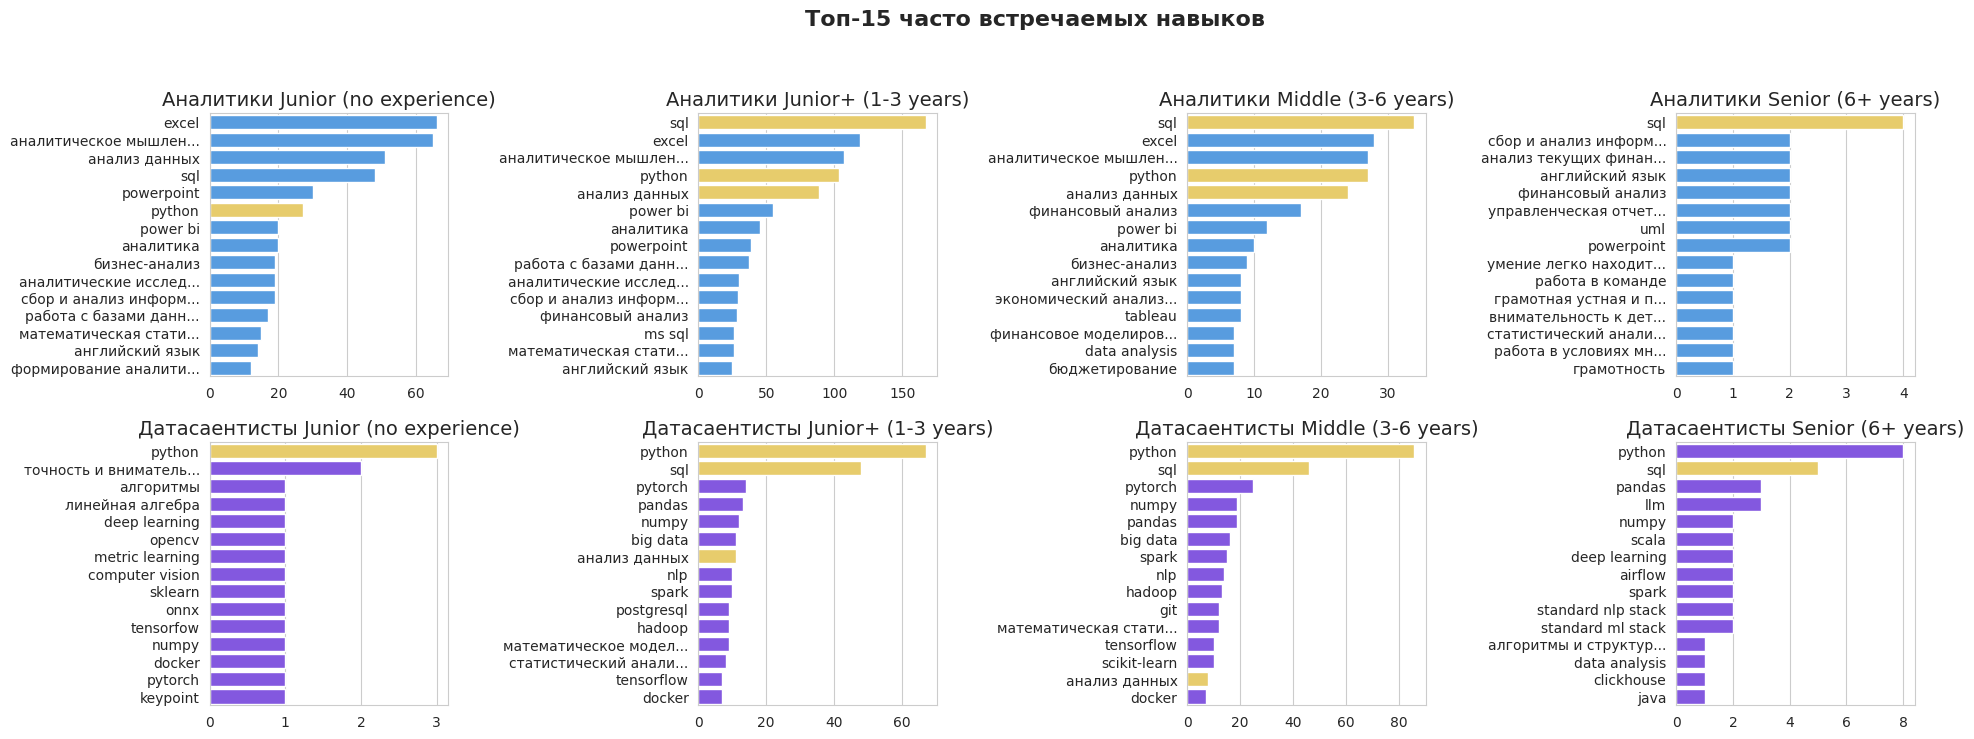

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), nrows=2, ncols=4)

grades = data.experience.unique()
for i, grade in enumerate(grades):
  freq_skills_da = get_list_skills(grade, 'DA', 15)
  freq_skills_ds = get_list_skills(grade, 'DS', 15)

  # находим общие навыки для калоризации на графике
  common_skills = set(freq_skills_da['skill']).intersection(set(freq_skills_ds['skill']))

  # Устанавливаем цвета для скиллов
  freq_skills_da['color'] = freq_skills_da['skill'].apply(
    lambda x: COLORS_DA['common'] if x in common_skills else COLORS['DA']
  )
  freq_skills_ds['color'] = freq_skills_ds['skill'].apply(
    lambda x: COLORS_DS['common'] if x in common_skills else COLORS['DS']
  )

  sns.barplot(x='freq', y='skill', hue='skill', legend=False, data=freq_skills_da, palette=freq_skills_da['color'].to_list(), ax=ax[0, i])

  ax[0, i].set_title(f"Аналитики {grade}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  sns.barplot(x='freq',  y='skill', hue='skill', data=freq_skills_ds, legend=False, palette=freq_skills_ds['color'].to_list(), ax=ax[1, i])

  ax[1, i].set_title(f"Датасаентисты {grade}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.subplots_adjust(wspace=1.05, hspace=0.25, top=0.85)

fig.suptitle('Топ-15 часто встречаемых навыков', fontsize=16, fontweight='bold')
plt.show()

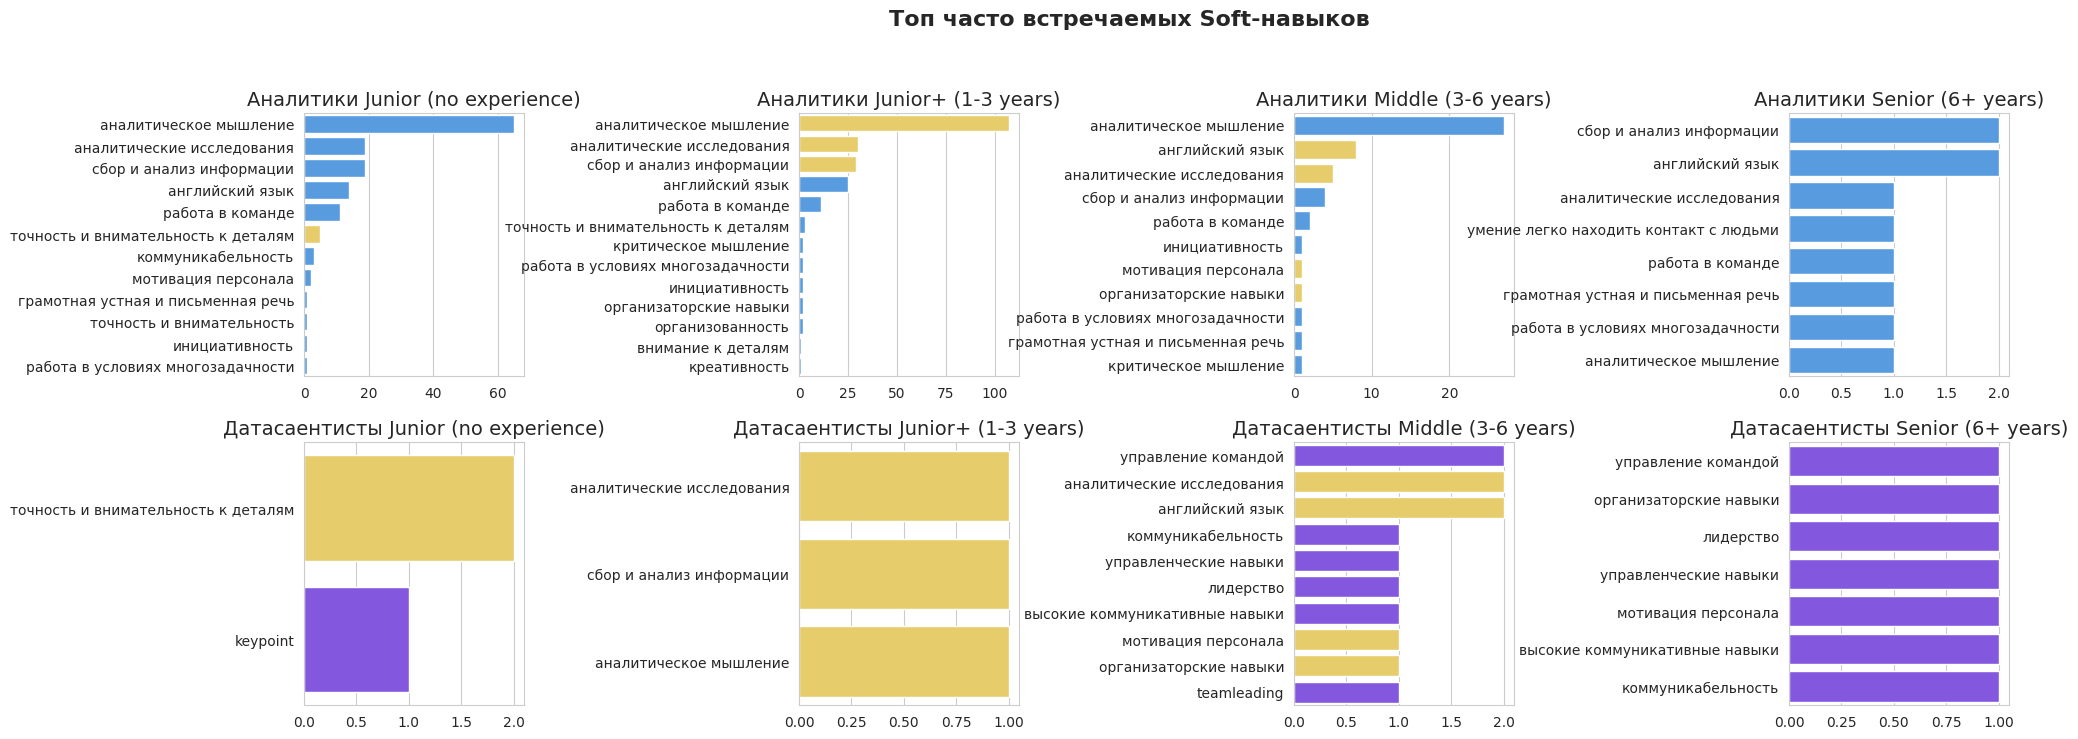

In [ ]:
def get_type_skill(skill: str) -> str:
  """
  Возвращает тип скилла - soft/hard в зависимости от наличия в листе SOFTS

  Parameters:
  skill (str): наименование навыка

  Returns:
  str: тип скилла

  """

  SOFTS = ['документация',
        'точность и внимательность',
        'коммуникация',
        'аналитическое мышление',
        'проактивность',
        'креативность',
        'принятие решений',
        'презентация',
        'переговоры',
        'внимание к деталям',
        'адаптивность',
        'решение проблем',
        'работа в команде',
        'лидерство',
        'критическое мышление',
        'письменная коммуникация',
        'адаптивность',
        'организованность',
        'творческий подход',
        'инициативность',
        'эмоциональный интеллект',
        'работа в условиях многозадачности',
        'грамотная устная и письменная речь',
        'английский язык',
        'умение легко находить контакт с людьми',
        'аналитические исследования',
        'коммуникабельность',
        'лидерство',
         'организаторские навыки',
         'управление командой',
         'высокие коммуникативные навыки',
         'мотивация персонала',
         'точность и внимательность к деталям',
         'консультирование клиентов'
         'деловая коммуникаци',
         'сбор и анализ информации',
         'коммуникабельность',
         'аналитические исследования',
         'аналитическое мышление',
         'teamleading',
         'управленческие навыки',
         'keypoint'
         ]

  if skill in SOFTS:
    return 'soft'
  return 'hard'


fig, ax = plt.subplots(figsize=(22, 8), nrows=2, ncols=4)

grades = data.experience.unique()

for i, grade in enumerate(grades):
  freq_skills_da = get_list_skills(grade, 'DA', data.shape[0])
  freq_skills_da.loc[:, 'type'] = freq_skills_da.skill.apply(get_type_skill)
  freq_skills_da = freq_skills_da.query('type == "soft"')

  freq_skills_ds = get_list_skills(grade, 'DS', data.shape[0])
  freq_skills_ds.loc[:, 'type'] = freq_skills_ds.skill.apply(get_type_skill)
  freq_skills_ds = freq_skills_ds.query('type == "soft"')

  # находим общие навыки для калоризации на графике
  common_skills = set(freq_skills_da['skill']).intersection(set(freq_skills_ds['skill']))

  # Устанавливаем цвета для скиллов
  freq_skills_da.loc[:, 'color'] = freq_skills_da['skill'].apply(
    lambda x: COLORS_DA['common'] if x in common_skills else COLORS['DA']
  )
  freq_skills_ds.loc[:, 'color'] = freq_skills_ds['skill'].apply(
    lambda x: COLORS_DS['common'] if x in common_skills else COLORS['DS']
  )

  sns.barplot(x='freq', y='skill', hue='skill', legend=False, data=freq_skills_da, palette=freq_skills_da['color'].to_list(), ax=ax[0, i])

  ax[0, i].set_title(f"Аналитики {grade}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  sns.barplot(x='freq',  y='skill', hue='skill', data=freq_skills_ds, legend=False, palette=freq_skills_ds['color'].to_list(), ax=ax[1, i])

  ax[1, i].set_title(f"Датасаентисты {grade}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.subplots_adjust(wspace=1.25, hspace=0.25, top=0.85)

fig.suptitle('Топ часто встречаемых Soft-навыков', fontsize=16, fontweight='bold')
plt.show()

**Выводы:** Аналитикам и дата-сайентистам необходимы навыки работы с SQL и Python. Однако для аналитиков более важен SQL, а для дата-сайентистов – Python.
Аналитикам также необходимо знать инструменты бизнес-аналитики (например, Power BI) и основы математической статистики.
Дата-сайентистам важно владеть основами линейной алгебры и понимать алгоритмы.
С повышением уровня должности требования к «мягким» навыкам (soft skills) возрастают, а к техническим («жёстким») навыкам (hard skills) – снижаются.

Среди софтовых скиллов преобладают знание языков, умение организовывать и управлять командой, высокие коммуникативные навыки и мотивация персонала. Причем аналитика на всех грейдах необходимо не только анализировать информацию, но и собирать ее.

# Определение типичного места работы для Аналитика данных и специалиста по Data Science

In [ ]:
def show_top_values(data: pd.DataFrame, key: str, title: str) -> None:
  fig, ax = plt.subplots(figsize=(22, 8), nrows=2, ncols=4)

  for i, grade in enumerate(data.experience.unique()):
    da = data[(data['area_spec'] == 'DA') & (data['experience'] == grade)].groupby(key, as_index=False).agg(count=('id', 'count')).sort_values(by='count', ascending=False)[:10]
    da[key] = da[key].apply(lambda x: x if len(x) < 18 else x[:18] + '...')

    ds = data[(data['area_spec'] == 'DS') & (data['experience'] == grade)].groupby(key, as_index=False).agg(count=('id', 'count')).sort_values(by='count', ascending=False)[:10]
    ds[key] = ds[key].apply(lambda x: x if len(x) < 18 else x[:18] + '...')

    # находим общие признаки для калоризации на графике
    common = set(da[key]).intersection(set(ds[key]))

    # устанавливаем цвета
    da['color'] = da[key].apply(
      lambda x: COLORS_DA['common'] if x in common else COLORS['DA']
      )

    ds['color'] = ds[key].apply(
      lambda x: COLORS_DS['common'] if x in common else COLORS['DS']
      )

    sns.barplot(x='count', y=key, hue=key, legend=False, data=da, palette=da.color.to_list(), ax=ax[0, i])

    ax[0, i].set_title(f"Аналитики {grade}", fontsize=14)
    ax[0, i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    ax[0, i].set_xlabel('')
    ax[0, i].set_ylabel('')

    sns.barplot(x='count',  y=key, hue=key, data=ds, legend=False, palette=ds.color.to_list(), ax=ax[1, i])

    ax[1, i].set_title(f"Датасаентисты {grade}", fontsize=14)
    ax[1, i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    ax[1, i].set_xlabel('')
    ax[1, i].set_ylabel('')

  plt.subplots_adjust(wspace=1.25, hspace=0.25, top=0.85)

  fig.suptitle(title, fontsize=16, fontweight='bold')
  plt.show()

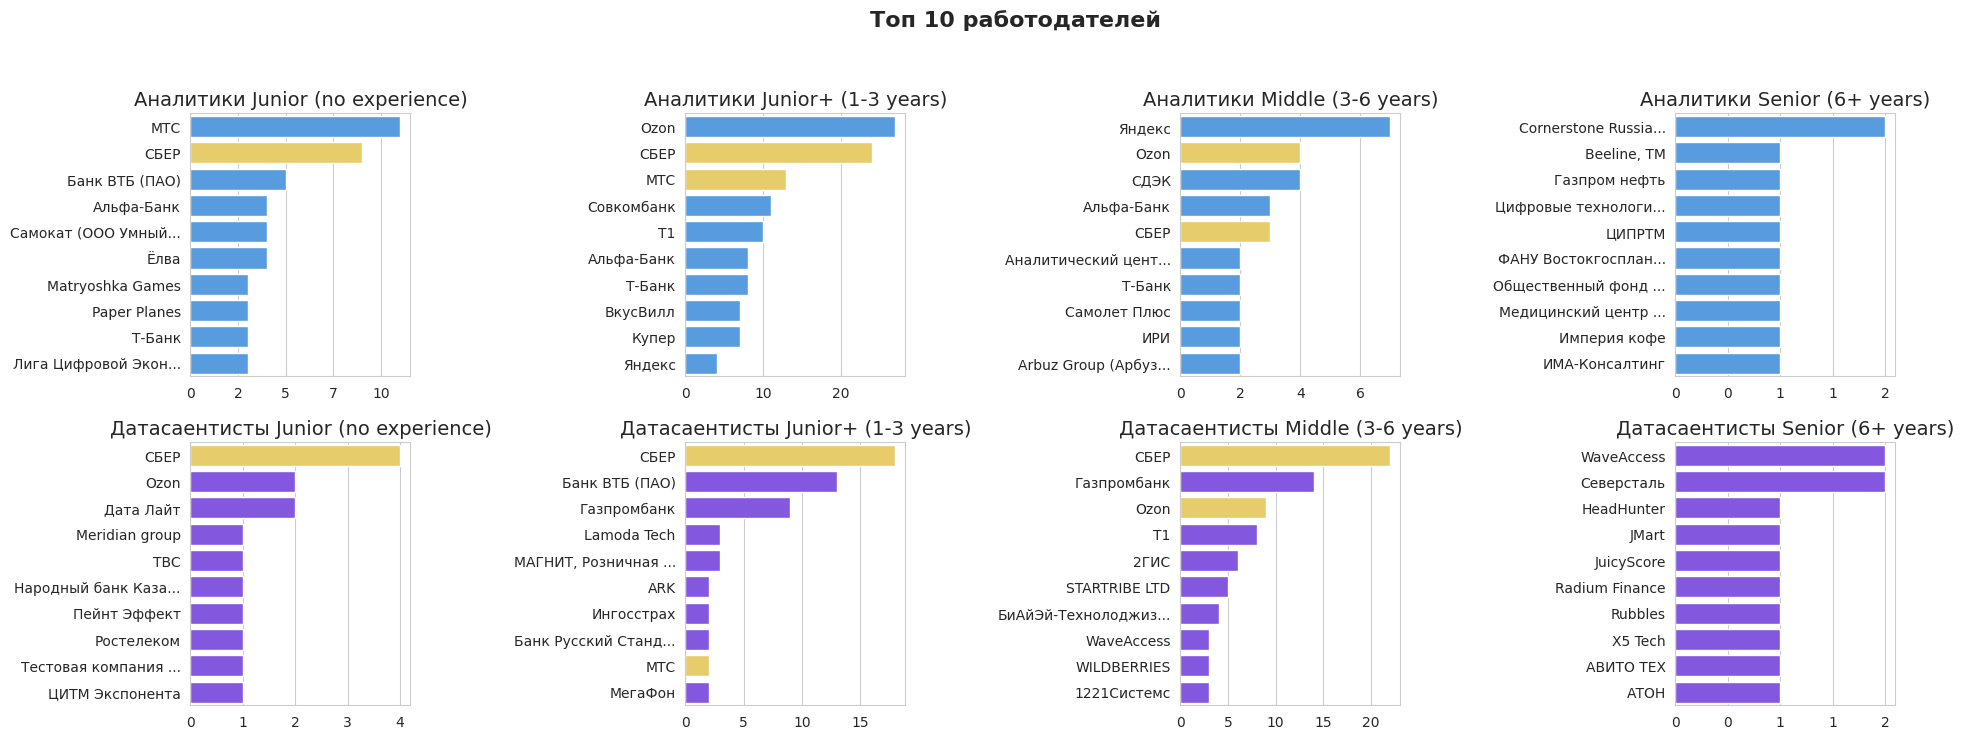

In [ ]:
show_top_values(data, 'employer', 'Топ 10 работодателей')

Среди работодателей по количеству вакансий лидирует СБЕР. Крупному банку требуются Аналитики и датасаентисты от Junior до Middle. ТАкже активно ищет аналитиков Ozon, им нуужны Junior+ - Middle аналитики и Junior, Middle датасаентисты. Среди компаний работодателей часто можно встреить маркетплейсы, банки, ретейл.

Расмотрим распределение типов занятости

In [ ]:
def show_share(data: pd.DataFrame, key: str, title: str, angle=30) -> None:
  fig, ax = plt.subplots(figsize=(25, 8), nrows=2, ncols=4)

  for i, grade in enumerate(data.experience.unique()):
    da = data.loc[(data['area_spec'] == 'DA') & (data['experience'] == grade)].groupby(key, as_index=False).agg(count=('id', 'count')).sort_values(by='count', ascending=False)[:10]
    ds = data.loc[(data['area_spec'] == 'DS') & (data['experience'] == grade)].groupby(key, as_index=False).agg(count=('id', 'count')).sort_values(by='count', ascending=False)[:10]

    ax[0, i].pie(data=da, x='count',
                 labels=[val[0] + f' \n {val[1] / da.loc[:, "count"].sum():.1%}' if val[1] > da.loc[:, 'count'].sum() * 0.01 else '' for val in da.iloc[:].values],
                 textprops={'fontsize': 10},
                 shadow=True,
                 startangle=angle,
                 colors=[COLORS_DA[key] for key in da[key]])
    ax[0, i].set_title(grade, fontsize=14)

    ax[1, i].pie(data=ds, x='count',
                 labels=[val[0] + f' \n {val[1] / ds.loc[:, "count"].sum():.1%}' if val[1] > ds.loc[:, 'count'].sum() * 0.01 else '' for val in ds.iloc[:].values],
                 textprops={'fontsize': 10},
                 shadow=True,
                 startangle=angle,
                 colors=[COLORS_DS[key] for key in ds[key]])
    ax[1, i].set_title(grade, fontsize=14)

  plt.subplots_adjust(wspace=1, hspace=0.25, top=0.85)

  fig.suptitle(title, fontsize=16, fontweight='bold')
  plt.show()

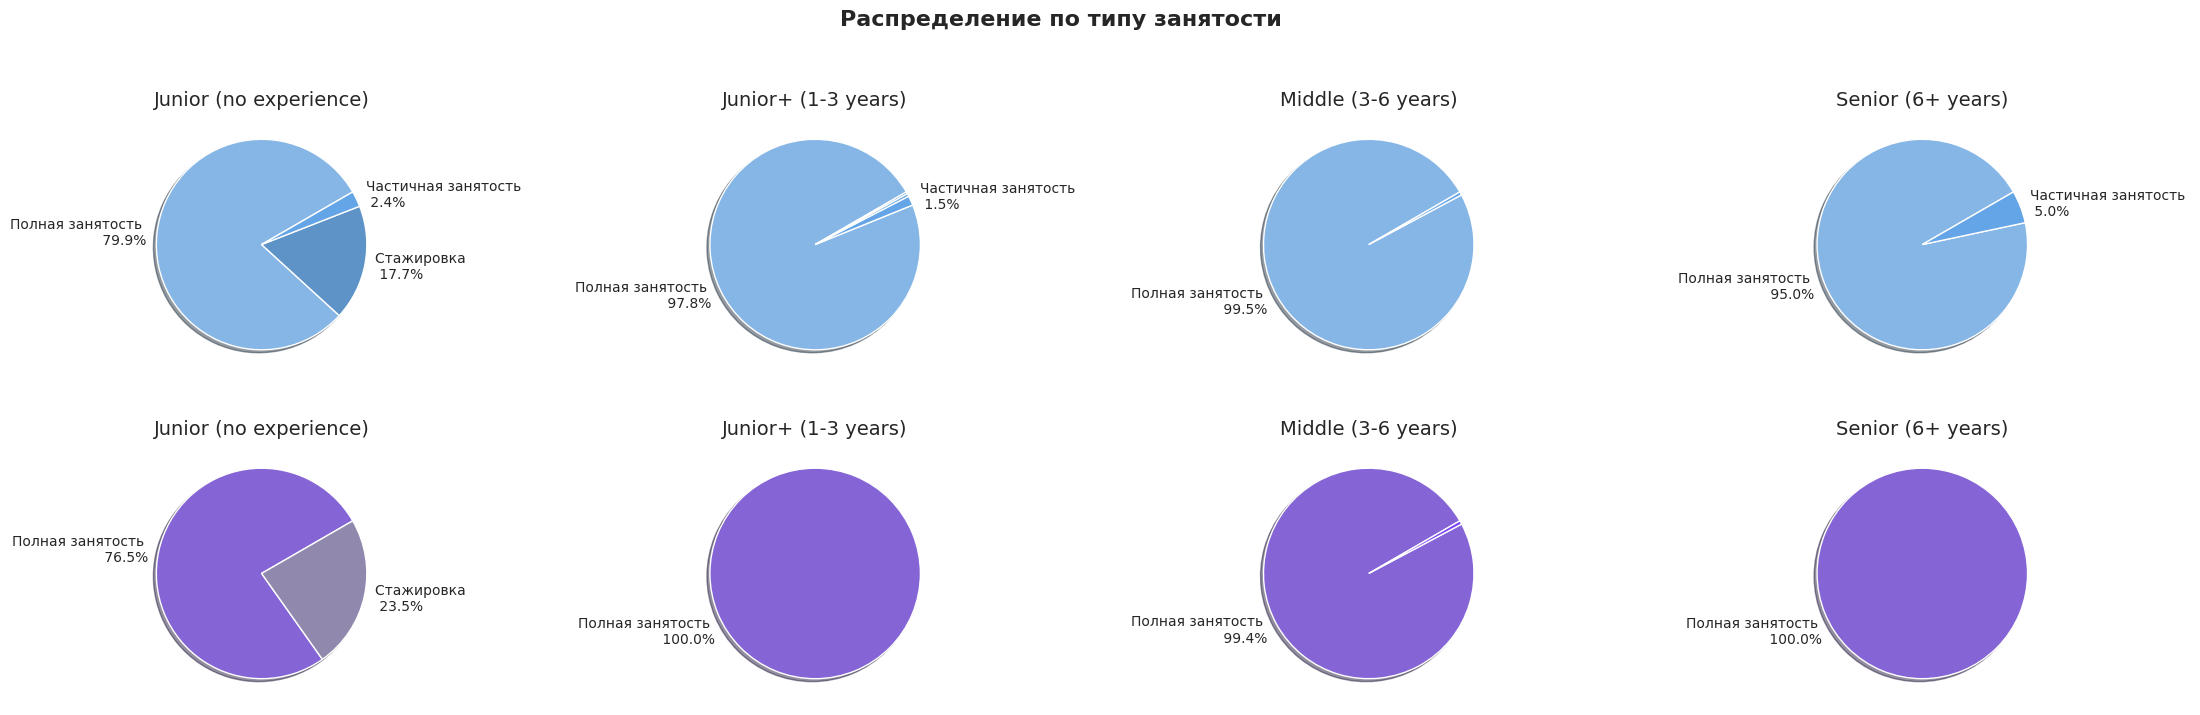

In [ ]:
show_share(data, 'employment', 'Распределение по типу занятости')

В большинстве случаев предлагается работа с полной занятостью для всех уровней специалистов. Также для Junior аналитиков и специалистов в области Data Science доступны стажировки. Стажировки более распространены среди специалистов в области Data Science, где их доля составляет 23%, по сравнению с 17% для Junior аналитиков.

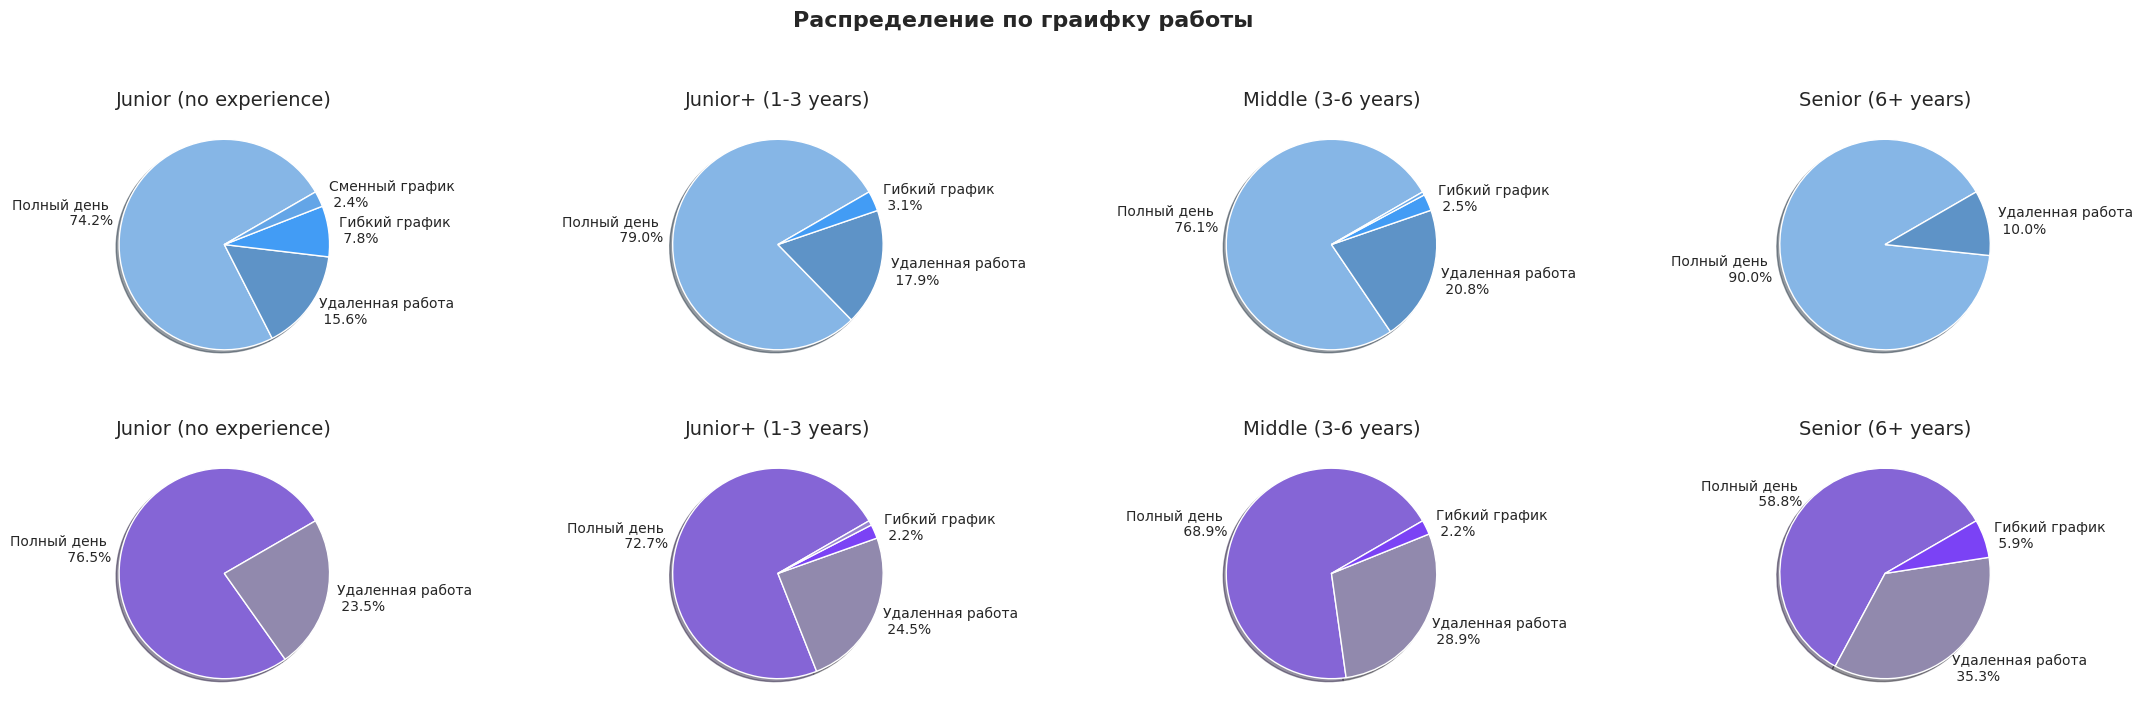

In [ ]:
show_share(data, 'schedule', 'Распределение по граифку работы')

Работодатели чаще всего ищут аналитиков и специалистов по data science на полный рабочий день. Но есть закономерность: чем больше опыта у специалиста, тем больше предложений о работе он может найти с возможностью работать удалённо. Исключение составляют старшие аналитики — доля таких вакансий составляет 10 %. В общем, предложений о работе с возможностью работать удалённо у специалистов по data science больше, чем у аналитиков.

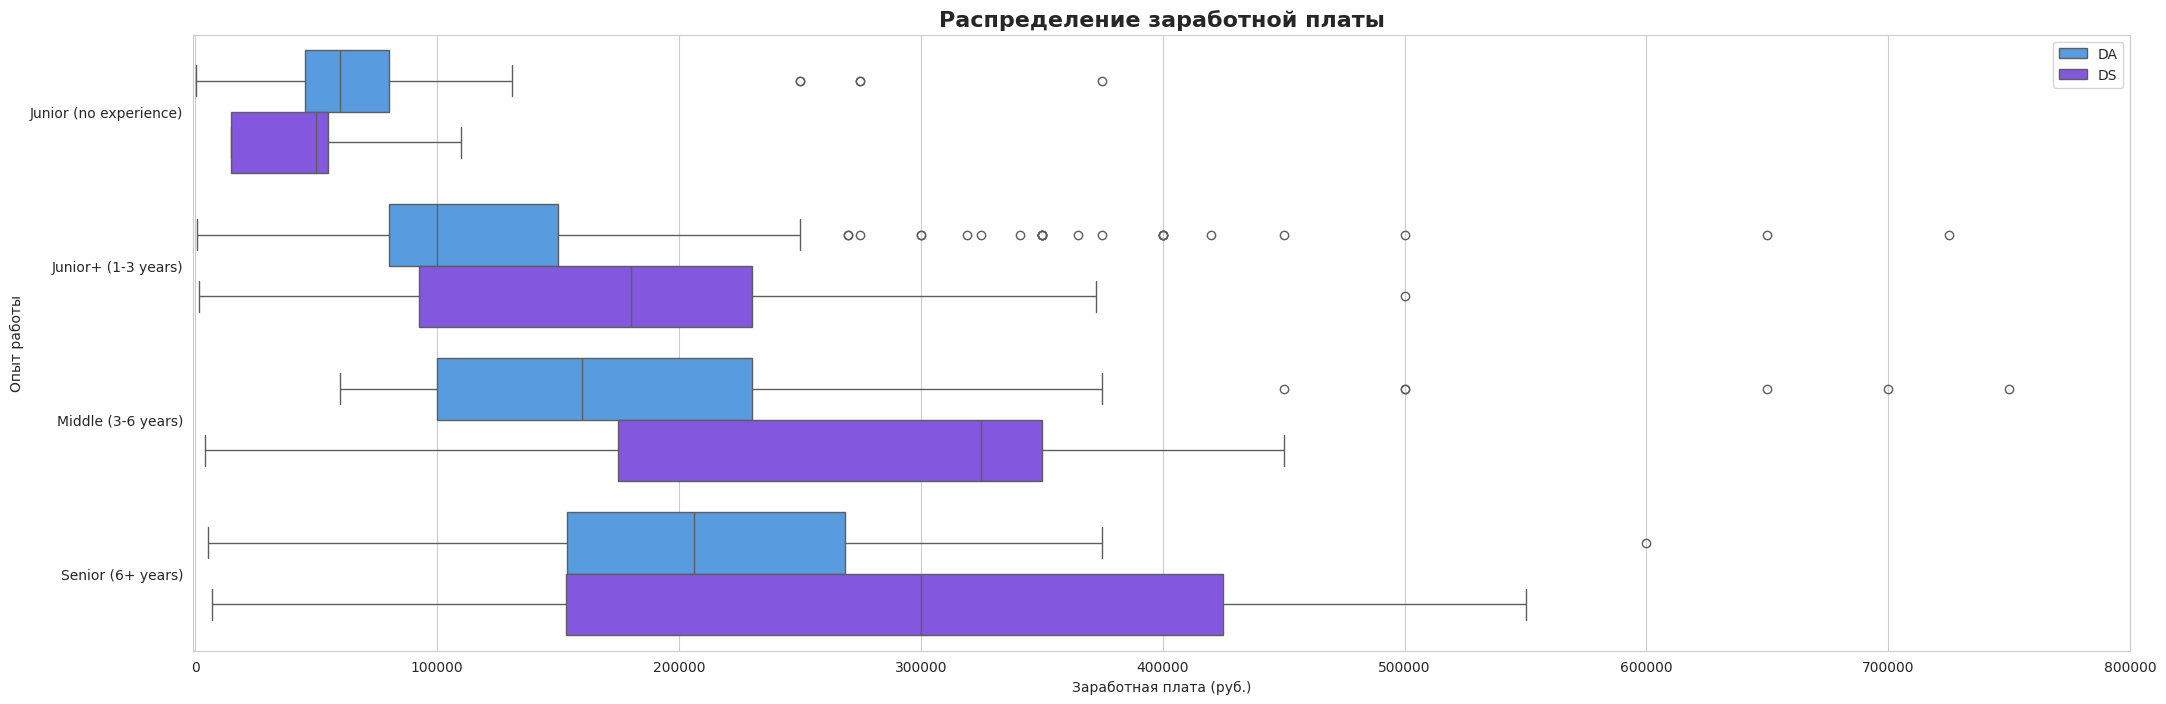

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))

order=data.groupby(['area_spec', 'experience'], as_index=False).agg(median=('salary', 'median')).sort_values(by='median').iloc[:6]['experience']
sns.boxplot(data=data, y='experience', x='salary', palette=[COLORS['DA'], COLORS['DS']], hue='area_spec', order=order, ax=ax)
ax.set_title('Распределение заработной платы', fontsize=16, fontweight='bold')
ax.set_ylabel('Опыт работы')
ax.set_xlabel('Заработная плата (руб.)')
plt.legend(title='', loc='upper right')
plt.xlim((-1000, 800000))
plt.show()

График показывает, что медианные зарплаты у аналитиков ниже, чем у специалистов по data science.

Junior аналитики зарабатывают больше 50 тысяч рублей, что превышает медианную зарплату у специалистов по data science на этом уровне. Однако в других категориях специалисты по data science получают больше. Так, медианная зарплата у Junior+ аналитика составляет 100 тысяч рублей, а у специалиста по data science — 180 тысяч.

У аналитиков уровня Middle медианная зарплата составляет 150 тысяч рублей, а у специалистов по data science — 320 тысяч.

Senior аналитики получают медианную зарплату выше 200 тысяч рублей, а специалисты по data science — 300 тысяч.

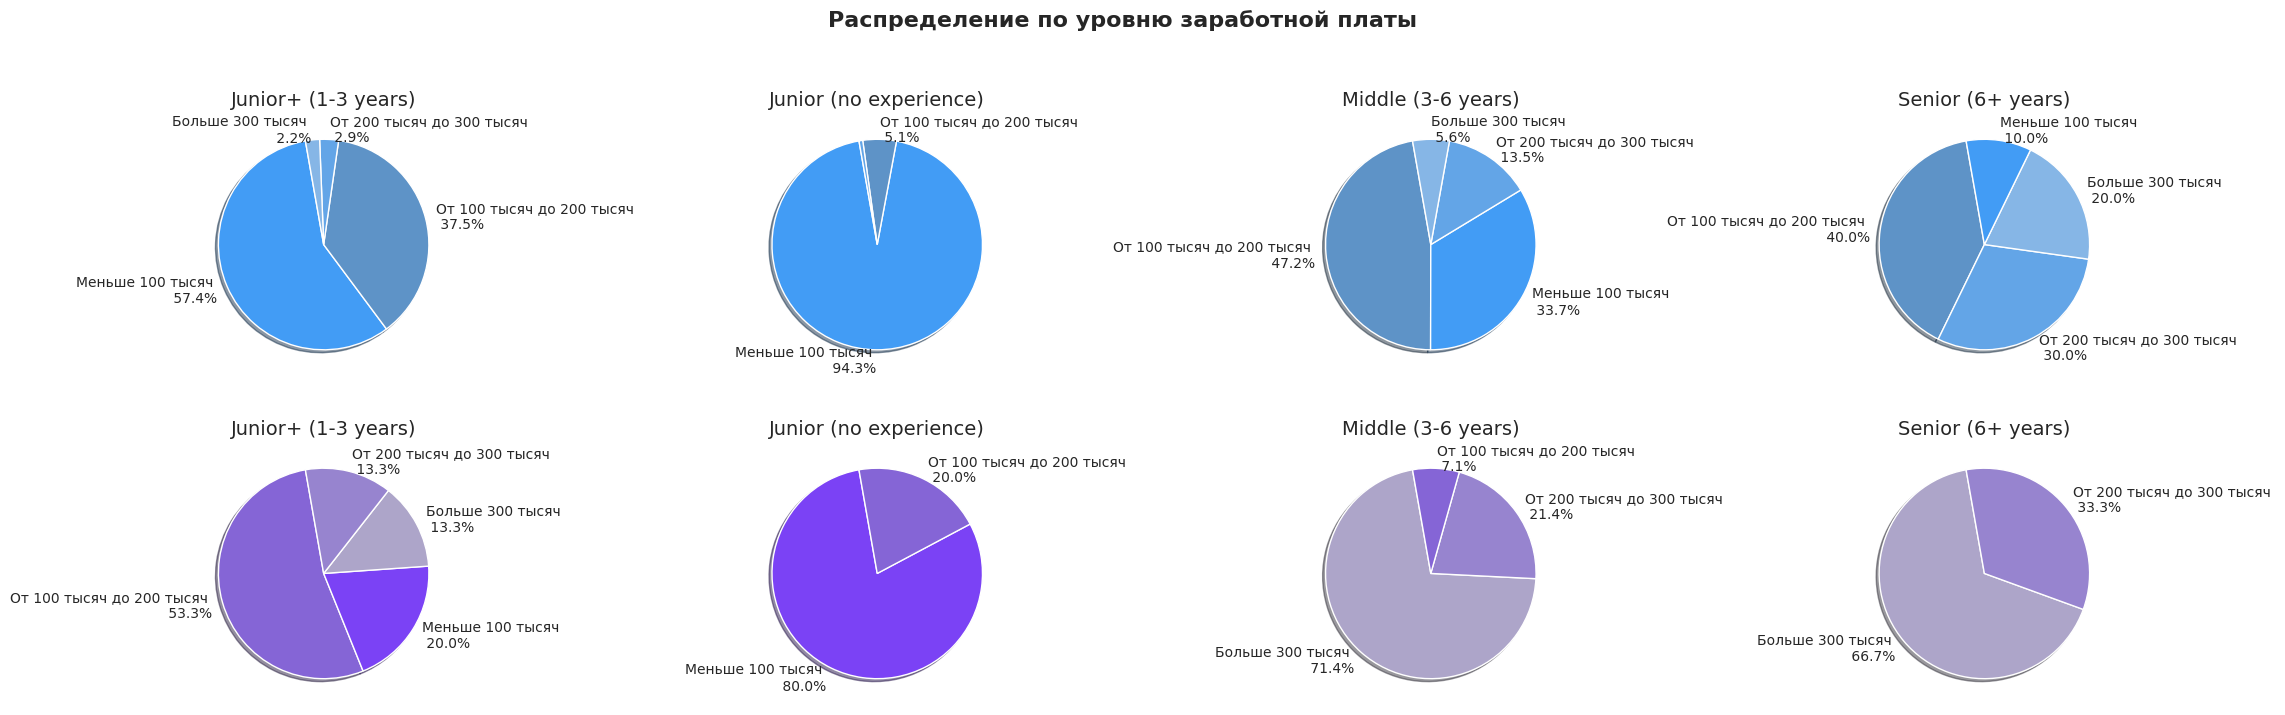

In [ ]:
show_share(data[data['salary_bin'] != 'ЗП не указана'], 'salary_bin', 'Распределение по уровню заработной платы', angle=100)

Из графика следует, что начинающим аналитикам и специалистам по data science чаще всего предлагают зарплату менее 100 тысяч рублей. Однако для специалистов по data science уровня Junior+ ситуация меняется: они чаще сталкиваются с вакансиями, где зарплата составляет от 100 до 200 тысяч рублей.

Аналитики уровня Middle чаще видят предложения с зарплатой от 100 до 200 тысяч рублей, а специалисты по data science того же уровня часто получают предложения с зарплатой более 300 тысяч рублей.

Предложения для senior-аналитиков с зарплатой от 300 тысяч рублей встречаются гораздо реже, чем для специалистов по data science того же уровня.

## Вывод по исследованию типичного места работы:

**Работодатели:** Сбербанк выделяется как лидер по количеству вакансий. Магнит и ВТБ также активно привлекают начинающих аналитикоак компании. OZON и Wildberrieтоже входят в число лидеров по количеству ваканисий.

**Тип занятости:** Для большинства категорий специалистов вакансии предлагают полную занятость. Стажировки чаще всего предлагаются джуниорам без опыта.

**Удаленная работа и опыт:** С ростом уровня опыта у аналитиков увеличивается доля предложений о возможности удаленной работы. У аналитиков наблюдается обратная тенденция, У Senior позиций доля таких предложений ниже остальных грейдов.

**Уровни зарплат:** Данные по зарплатам показывают, что как правило начинающие специалисты без опыта работы получают зарплату меньше 100 т.р. Сравнивая зарплаты junior+ и middle специалистов, можно заметить что как правило зарплаты датасаентистов выше зарплат аналитиков. Так же необходимо учитывать наличие вакансий с частичной занятостью, где могут предлагать итоговую зарплату значительно ниже полноценной.

 # Таблица навыков идеальных кандидатов

In [ ]:
def top_skills(spec: str):
  top_skills = pd.DataFrame()
  for i, grade in enumerate(data.experience.unique()):
    skills = get_list_skills(grade, spec, 15).skill
    top_skills[grade] = skills
  return top_skills

In [ ]:
top_skills('DA')

,Junior (no experience),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,excel,sql,sql,sql
1,аналитическое мышлен...,excel,excel,сбор и анализ информ...
2,анализ данных,аналитическое мышлен...,аналитическое мышлен...,анализ текущих финан...
3,sql,python,python,английский язык
4,powerpoint,анализ данных,анализ данных,финансовый анализ
5,python,power bi,финансовый анализ,управленческая отчет...
6,power bi,аналитика,power bi,uml
7,аналитика,powerpoint,аналитика,powerpoint
8,бизнес-анализ,работа с базами данн...,бизнес-анализ,умение легко находит...
9,аналитические исслед...,аналитические исслед...,английский язык,работа в команде


In [ ]:
top_skills('DS')

,Junior (no experience),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,python,python,python,python
1,точность и вниматель...,sql,sql,sql
2,алгоритмы,pytorch,pytorch,pandas
3,линейная алгебра,pandas,numpy,llm
4,deep learning,numpy,pandas,numpy
5,opencv,big data,big data,scala
6,metric learning,анализ данных,spark,deep learning
7,computer vision,nlp,nlp,airflow
8,sklearn,spark,hadoop,spark
9,onnx,postgresql,git,standard nlp stack


# Типичное место работы

In [ ]:
def calc_typical_place(name_type: str) -> pd.DataFrame:
    """
    Собирает и возвращает таблицу с типичными характеристиками мест работы для заданной категории вакансий.

    Функция агрегирует данные по работодателям, типам занятости, графикам работы и категориям зарплат для каждого уровня опыта.
    Результат представляется в виде таблицы, которая может быть использована для анализа типичных условий работы в отрасли.

    Parameters:
    name_type (str): Категория вакансии ('da' для аналитиков данных или 'ds' для датасаентистов).

    Returns:
    pd.DataFrame: Таблица с типичными характеристиками мест работы.
    """
    idx = ['Работодатель', 'Тип занятости', 'График работы', 'Заработная плата']

    def calc_salary_mode(ser):
      return ser[ser != 'ЗП не указана'].mode()
    # Агрегируем данные по каждому уровню опыта и каждой характеристике места работы
    table = pd.concat(
        [data[(data.area_spec == name_type) & (data.experience == grade)]
         .agg(dict(zip(['employer', 'employment', 'schedule', 'salary_bin'], [pd.Series.mode]*3 + [calc_salary_mode])))
         .T for grade in grades], axis=1
    ).fillna('Нет данных')[0]  # Заполняем отсутствующие данные
    table.index = idx  # Назначаем индекс таблицы
    table.columns = grades  # Назначаем названия колонок
    return table

In [ ]:
calc_typical_place('DA')

,Junior (no experience),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
Работодатель,МТС,Ozon,Яндекс,Cornerstone Russia
Тип занятости,Полная занятость,Полная занятость,Полная занятость,Полная занятость
График работы,Полный день,Полный день,Полный день,Полный день
Заработная плата,Меньше 100 тысяч,Меньше 100 тысяч,От 100 тысяч до 200 тысяч,От 100 тысяч до 200 тысяч


In [ ]:
calc_typical_place('DS')

,Junior (no experience),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
Работодатель,СБЕР,СБЕР,СБЕР,WaveAccess
Тип занятости,Полная занятость,Полная занятость,Полная занятость,Полная занятость
График работы,Полный день,Полный день,Полный день,Полный день
Заработная плата,Меньше 100 тысяч,От 100 тысяч до 200 тысяч,Больше 300 тысяч,Больше 300 тысяч


In [ ]:
tp_da = calc_typical_place('DA')
tp_ds = calc_typical_place('DS')

In [ ]:
tp_da.to_csv('/content/typical_da.csv')
tp_ds.to_csv('/content/typical_ds.csv')